In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [4]:
df1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4


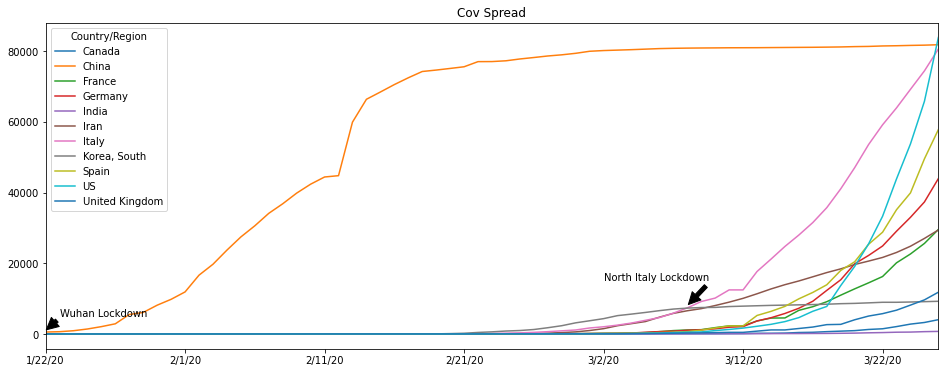

In [7]:
countries = ['Canada', 'US', 'Italy', 'Spain', 'Germany', 'United Kingdom', 'Iran', 'India', 'Korea, South', 'France', 'China']

f1 = df1['Country/Region'].isin(countries)
data = df1.loc[f1,:].drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()

fig, ax = plt.subplots(figsize=(16,6))
data.T.plot(ax=ax)
plt.title('Cov Spread')

plt.annotate('Wuhan Lockdown', xy=(0, 1000), xytext=(1, 5000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('North Italy Lockdown', xy=(46, 8000), xytext=(40, 15000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('Cov Spread.png')

In [0]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(data, ax = ax, cmap='Blues')
plt.title('Cov Heat Map')
#plt.savefig('Cov Heat Map.png')

In [0]:
top10 = df1.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().sort_values('3/19/20', ascending=False).head(10).index.values

In [0]:
f2 = df1['Country/Region'].isin(top10)
data = df1.loc[f2,:].drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()

fig, ax = plt.subplots(figsize=(16,6))
data.T.plot(ax=ax)
plt.title('Cov Spread Top 10')

plt.annotate('Wuhan Lockdown', xy=(0, 1000), xytext=(1, 5000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('North Italy Lockdown', xy=(46, 8000), xytext=(40, 15000),
            arrowprops=dict(facecolor='black', shrink=0.05))

#plt.savefig('Cov Spread.png')